In [3]:
!pwd
import os
# os.chdir("..")

/mnt/data/home/xiayan/HMR-4D


In [70]:
import torch
import hmr4d.utils.TUM_utils as TUM
from hmr4d.utils.geo_transform import apply_Ts_on_seq_points
from matplotlib import pyplot as plt
import importlib
%matplotlib widget

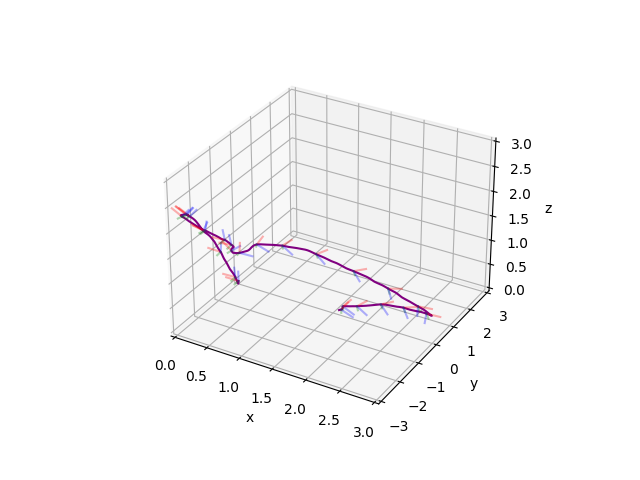

In [106]:
importlib.reload(TUM)

if True:

    path = "inputs/traj/test.txt"
    tth = TUM.TUMTrajHelper(path)
    traj = tth.traj
    c_ax_x = torch.zeros_like(traj).float()
    c_ax_y = torch.zeros_like(traj).float()
    c_ax_z = torch.zeros_like(traj).float()
    c_ax_x[:, 0] = 0.2
    c_ax_y[:, 1] = 0.2
    c_ax_z[:, 2] = 0.2
    w_ax_x = apply_Ts_on_seq_points(c_ax_x, tth.T_c2w)
    w_ax_y = apply_Ts_on_seq_points(c_ax_y, tth.T_c2w)
    w_ax_z = apply_Ts_on_seq_points(c_ax_z, tth.T_c2w)
    
    
    # prepare canvas
    fig = plt.figure()
    ax = fig.add_subplot(projection="3d")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.set_xlim3d(0,3)
    ax.set_ylim3d(-3,3)
    ax.set_zlim3d(0,3)
    
    # paint camera moving path
    ax.plot(traj[:, 0], traj[:, 1], traj[:, 2], color="purple")
    # paint camera coordinate axis
    # ax.plot(eye_point_W[:, 0], eye_point_W[:, 1], eye_point_W[:, 2])
    stride = 50
    for i in range(0, traj.shape[0], stride):
        ax.plot([traj[i, 0], w_ax_x[i, 0]], [traj[i, 1], w_ax_x[i, 1]], [traj[i, 2], w_ax_x[i, 2]], color="red", alpha=0.3)
        ax.plot([traj[i, 0], w_ax_y[i, 0]], [traj[i, 1], w_ax_y[i, 1]], [traj[i, 2], w_ax_y[i, 2]], color="green", alpha=0.3)
        ax.plot([traj[i, 0], w_ax_z[i, 0]], [traj[i, 1], w_ax_z[i, 1]], [traj[i, 2], w_ax_z[i, 2]], color="blue", alpha=0.3)

    plt.show()